## MySQL에서 데이터 로드 

In [ ]:
import pymysql
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import config 
from config import DB_CONFIG
import pymysql  

In [2]:
# MySQL 연결
conn = pymysql.connect(
    host=DB_CONFIG['host'],
    user=DB_CONFIG['user'],
    password=DB_CONFIG['password'],
    database=DB_CONFIG['database'],
    port=DB_CONFIG['port']
)

In [3]:
car_siren = f"SELECT * FROM merge50_car_siren"
car_horn = f"SELECT * FROM merge50_car_horn"
car_driving = f'SELECT * FROM merge50_car_driving'
motorcycle_horn  = f'SELECT * FROM merge50_motorcycle_horn'
motorcycle_driving  = f'SELECT * FROM merge50_motorcycle_driving'

car_siren_df =  pd.read_sql(car_siren, conn)
car_horn_df = pd.read_sql(car_horn, conn) 
car_driving_df = pd.read_sql(car_driving, conn) 
motorcycle_horn_df= pd.read_sql(motorcycle_horn, conn) 
motorcycle_driving_df = pd.read_sql(motorcycle_driving, conn) 

conn.close()

/tmp/ipykernel_10443/1700635407.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_siren_df =  pd.read_sql(car_siren, conn)
/tmp/ipykernel_10443/1700635407.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_horn_df = pd.read_sql(car_horn, conn)
/tmp/ipykernel_10443/1700635407.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_driving_df = pd.read_sql(car_driving, conn)
/tmp/ipykernel_10443/1700635407.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI o

# EDA 및 전처리

In [4]:
print(f'car_siren 데이터 개수: {car_siren_df.shape[0]}')
print(f'car_horn 데이터 개수: {car_horn_df.shape[0]}')
print(f'car_driving 데이터 개수: {car_driving_df.shape[0]}')
print(f'motorcycle_horn 데이터 개수: {motorcycle_horn_df.shape[0]}')
print(f'motorcycle_driving 데이터 개수: {motorcycle_driving_df.shape[0]}')

car_siren 데이터 개수: 1990
car_horn 데이터 개수: 3189
car_driving 데이터 개수: 1682
motorcycle_horn 데이터 개수: 4560
motorcycle_driving 데이터 개수: 4735


In [5]:
car_horn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fileName       3189 non-null   object 
 1   labelName      3189 non-null   object 
 2   area_start     3189 non-null   float64
 3   area_end       3189 non-null   float64
 4   category_01    3189 non-null   object 
 5   category_02    3189 non-null   object 
 6   category_03    3189 non-null   object 
 7   decibel        3189 non-null   int64  
 8   soundQuality   3189 non-null   object 
 9   subCategory    3189 non-null   object 
 10  bitRate        3189 non-null   object 
 11  duration       3189 non-null   float64
 12  fileFormat     3189 non-null   object 
 13  fileSize       3189 non-null   int64  
 14  recodingType   3189 non-null   object 
 15  sampleRate     3189 non-null   object 
 16  acqDevice      3189 non-null   object 
 17  acqMethod      3189 non-null   object 
 18  acqType 

In [6]:
car_horn_df.iloc[ : ,-13:] 

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,-328.99643,110.927765,13.474552,37.183453,-10.836115,25.585962,0.232516,5.053774,12.176615,4.831705,-8.831820,10.174751,2.365335
1,-380.94937,82.016785,-38.369390,10.472818,-25.531940,-0.819976,-21.547447,16.138535,-0.490012,0.726548,-9.243734,-1.005557,-10.407813
2,-498.20813,114.061424,1.980113,-2.516794,-12.093688,21.846487,10.806868,14.971516,9.503950,15.538783,15.781241,0.750223,-8.508451
3,-456.39767,111.490440,-6.244432,18.060278,-17.298338,28.503597,14.064431,7.452422,12.441176,16.612614,2.910048,-6.256705,-6.246398
4,-199.50888,199.641110,-13.681638,21.661055,-9.801945,12.513287,2.843365,8.194932,7.828580,8.889499,5.067267,2.928293,10.400720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,-264.83923,197.210750,-77.277880,23.032236,11.380154,7.896886,11.269576,-4.560492,17.224950,4.160231,-1.057662,0.926013,-7.930759
3185,-426.90427,130.722400,47.745327,8.306962,5.675391,15.449170,5.677291,6.208929,-0.195498,-5.397255,-2.674880,-6.652485,-10.272819
3186,-316.11063,194.271060,-29.530697,35.808052,12.489090,23.182838,11.050718,3.705868,11.450807,-0.165664,2.353512,0.390641,5.358946
3187,-228.09323,64.343980,-13.663012,41.246460,-7.827433,21.293640,-13.415158,3.358162,5.326135,-3.165687,-11.261456,-1.512664,6.411310


In [7]:
#데이터프레임 병합 
df_combined = pd.concat([car_horn_df, car_siren_df,car_driving_df,motorcycle_horn_df,motorcycle_driving_df], ignore_index=True)

print(f'df_combined 행 개수: {len(df_combined)}') 
df_combined.head()

df_combined 행 개수: 16156


,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,subCategory,...,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,1.car_horn_30849_1.wav,1.car_horn_30849_1.wav,2.0,11.048,교통소음,자동차,차량경적,68,정상,소형차경적,...,37.183453,-10.836115,25.585962,0.232516,5.053774,12.176615,4.831705,-8.831820,10.174751,2.365335
1,1.car_horn_30865_1.wav,1.car_horn_30865_1.wav,2.0,10.672,교통소음,자동차,차량경적,75,정상,소형차경적,...,10.472818,-25.531940,-0.819976,-21.547447,16.138535,-0.490012,0.726548,-9.243734,-1.005557,-10.407813
2,1.car_horn_30869_1.wav,1.car_horn_30869_1.wav,2.0,12.245,교통소음,자동차,차량경적,68,정상,소형차경적,...,-2.516794,-12.093688,21.846487,10.806868,14.971516,9.503950,15.538783,15.781241,0.750223,-8.508451
3,1.car_horn_30874_1.wav,1.car_horn_30874_1.wav,2.0,10.289,교통소음,자동차,차량경적,69,정상,소형차경적,...,18.060278,-17.298338,28.503597,14.064431,7.452422,12.441176,16.612614,2.910048,-6.256705,-6.246398
4,1.car_horn_59_1.wav,1.car_horn_59_1.wav,2.0,4.029,교통소음,자동차,차량경적,107,정상,소형차경적,...,21.661055,-9.801945,12.513287,2.843365,8.194932,7.828580,8.889499,5.067267,2.928293,10.400720


In [8]:
df_combined.iloc[ : ,-13:] 

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,-328.99643,110.927765,13.474552,37.183453,-10.836115,25.585962,0.232516,5.053774,12.176615,4.831705,-8.831820,10.174751,2.365335
1,-380.94937,82.016785,-38.369390,10.472818,-25.531940,-0.819976,-21.547447,16.138535,-0.490012,0.726548,-9.243734,-1.005557,-10.407813
2,-498.20813,114.061424,1.980113,-2.516794,-12.093688,21.846487,10.806868,14.971516,9.503950,15.538783,15.781241,0.750223,-8.508451
3,-456.39767,111.490440,-6.244432,18.060278,-17.298338,28.503597,14.064431,7.452422,12.441176,16.612614,2.910048,-6.256705,-6.246398
4,-199.50888,199.641110,-13.681638,21.661055,-9.801945,12.513287,2.843365,8.194932,7.828580,8.889499,5.067267,2.928293,10.400720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16151,-216.76335,227.552900,-82.289760,16.343384,-4.159147,-1.904160,10.840672,-6.094479,17.134110,-8.040121,-5.996139,-3.300848,-16.263510
16152,-260.36172,232.860840,-65.116700,39.084170,-3.065447,-7.736792,3.819775,-23.061602,6.557758,-13.926962,0.232121,0.180463,-9.043220
16153,-226.24818,233.032470,-56.155680,20.904785,-7.488766,-5.550318,1.841214,-16.429771,5.814109,-12.387865,-7.400935,-5.786819,-12.857692
16154,-200.10258,227.743970,-65.901590,5.604812,-13.910416,-17.113100,-6.478857,-20.236270,-2.118787,-16.228954,-6.787997,-3.972823,-13.148409


# 원천데이터 모델링

In [ ]:
!nvidia-smi

In [ ]:
import tensorflow as tf

# GPU를 사용하지 않도록 설정
tf.config.set_visible_devices([], 'GPU')
if physical_devices:
    print(f"사용 가능한 GPU: {physical_devices}")
else:
    print("GPU를 사용할 수 없습니다. CPU에서 실행됩니다.")

In [11]:
# 레이블(label)과 피처(features) 분리
X = df_combined.iloc[ : ,-13:]  # 원하는 MFCC 열만 선택
y = df_combined['category_03']  #차량경적, 차량사이렌

# 범주형 데이터(레이블) 숫자로 변환
y = y.astype('category').cat.codes

# 데이터셋 분할 (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train을 numpy 배열로 변환 후 reshape
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# 클래스 수 (필요에 따라 수정)
num_classes = len(set(y))

model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

import time
start_time = time.time()

history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_test, y_test))

end_time = time.time()
total_time = end_time - start_time
total_minutes = total_time / 60  
print(f"총 학습 시간: {total_minutes:.2f}분")


Epoch 1/50
    1/12924 [..............................] - ETA: 2:57:31 - loss: 36.5595 - accuracy: 0.0000e+00

2025-02-25 14:13:41.388579: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f6a44009040 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-02-25 14:13:41.388631: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2025-02-25 14:13:41.395391: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-25 14:13:41.430936: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12924/12924 [==============================] - 38s 3ms/step - loss: 0.7717 - accuracy: 0.7417 - val_loss: 0.5043 - val_accuracy: 0.8032
Epoch 2/50
12924/12924 [==============================] - 24s 2ms/step - loss: 0.5277 - accuracy: 0.8016 - val_loss: 0.5135 - val_accuracy: 0.7905
Epoch 3/50
12924/12924 [==============================] - 32s 2ms/step - loss: 0.4972 - accuracy: 0.8155 - val_loss: 0.4765 - val_accuracy: 0.8147
Epoch 4/50
12924/12924 [==============================] - 35s 3ms/step - loss: 0.4726 - accuracy: 0.8259 - val_loss: 0.4560 - val_accuracy: 0.8363
Epoch 5/50
12924/12924 [==============================] - 24s 2ms/step - loss: 0.4635 - accuracy: 0.8265 - val_loss: 0.4735 - val_accuracy: 0.8264
Epoch 6/50
12924/12924 [==============================] - 24s 2ms/step - loss: 0.4467 - accuracy: 0.8374 - val_loss: 0.3973 - val_accuracy: 0.8540
Epoch 7/50
12924/12924 [==============================] - 24s 2ms/step - loss: 0.4433 - accuracy: 0.8387 - val_loss: 0.4012 - val

In [15]:
import random
import numpy as np

X_test = X_test.reset_index(drop=True)

# 테스트 데이터에서 샘플 선택
index = random.randint(0, len(X_test) - 1)
sample = X_test.iloc[index].values.reshape(1, X_test.shape[1], 1)  # CNN 입력 형태로 변환

# 예측 수행
prediction = model.predict(sample)
predicted_label = np.argmax(prediction)

print(f"실제 라벨: {y_test.iloc[index]}")

print(f"예측된 라벨: {predicted_label}")

1/1 [==============================] - 0s 16ms/step
실제 라벨: 0
예측된 라벨: 0


In [19]:
# 모델평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"테스트 데이터 정확도: {test_acc:.4f}")


101/101 [==============================] - 0s 1ms/step - loss: 0.4832 - accuracy: 0.8496
테스트 데이터 정확도: 0.8496


In [ ]:
# 예측 수행
y_pred = model.predict(X_test).argmax(axis=1)

# 클래스 레이블 가져오기
class_labels = df_combined['category_03'].astype('category').cat.categories
print("클래스 레이블: ", class_labels)

# 클래스 이름 리스트 생성
class_names = class_labels.tolist()

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n혼동 행렬 (Confusion Matrix) with Class Names:")
print(pd.DataFrame(conf_matrix, index=class_names, columns=class_names))

# 분류 리포트 출력
print("\n정밀도(Precision) - 재현율(Recall) 분석 with Class Names")
print(classification_report(y_test, y_pred, target_names=class_names))

101/101 [==============================] - 0s 1ms/step
클래스 레이블:  Index(['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음'], dtype='object')

혼동 행렬 (Confusion Matrix) with Class Names:
        이륜차경적  이륜차주행음  차량경적  차량사이렌  차량주행음
이륜차경적     881       5    63      0      0
이륜차주행음     11     820    45      6     33
차량경적       44      43   520      7      7
차량사이렌       0       4    16    395      7
차량주행음      24     130    20     21    130

정밀도(Precision) - 재현율(Recall) 분석 with Class Names
              precision    recall  f1-score   support

       이륜차경적       0.92      0.93      0.92       949
      이륜차주행음       0.82      0.90      0.86       915
        차량경적       0.78      0.84      0.81       621
       차량사이렌       0.92      0.94      0.93       422
       차량주행음       0.73      0.40      0.52       325

    accuracy                           0.85      3232
   macro avg       0.83      0.80      0.81      3232
weighted avg       0.85      0.85      0.84      3232



## 훈련 정확도와 검증 정확도 비교

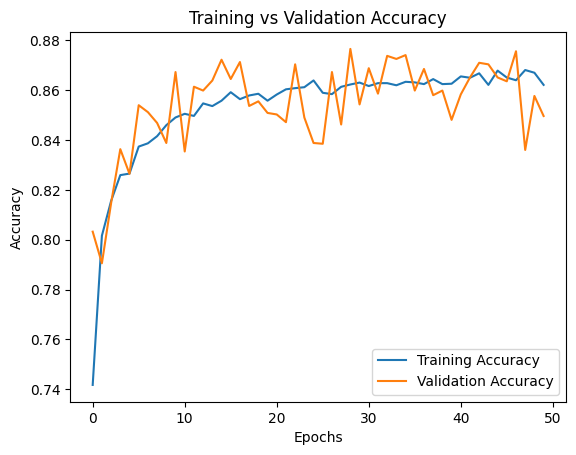

In [22]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

## 혼동행렬

101/101 [==============================] - 0s 1ms/step


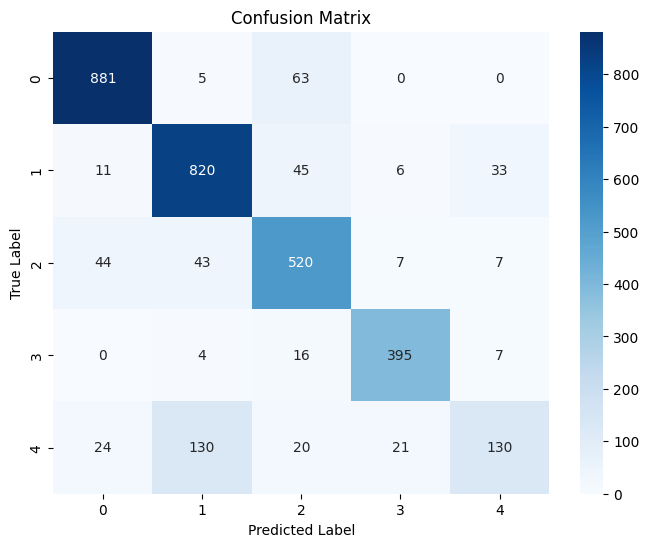

In [23]:
# 예측값 생성
y_pred = np.argmax(model.predict(X_test), axis=1)

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## 2차 모델링 테스트 - Early Stopping, ReduceLROnPlateau, Dropout 추가, batch_size 증가

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import time

# 레이블(label)과 피처(features) 분리
X = df_combined.iloc[:, -13:]  # 원하는 MFCC 열만 선택
y = df_combined['category_03']  # 차량경적, 차량사이렌

# 범주형 데이터(레이블) 숫자로 변환
y = y.astype('category').cat.codes

# 데이터셋 분할 (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train을 numpy 배열로 변환 후 reshape
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# 클래스 수
num_classes = len(set(y))

# CNN 모델 생성
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),  # 과적합 방지를 위한 Dropout 추가
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),  # 추가 Dropout 적용
    Dense(num_classes, activation='softmax')
])

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 콜백 함수 설정 - EarlyStopping 과 ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# 모델 학습
start_time = time.time()

history = model.fit(
    X_train, y_train, 
    epochs=50, batch_size=64, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping, reduce_lr]
)

end_time = time.time()
total_minutes = (end_time - start_time) / 60  
print(f"총 학습 시간: {total_minutes:.2f}분")

Epoch 1/50
202/202 [==============================] - 1s 3ms/step - loss: 2.4859 - accuracy: 0.5416 - val_loss: 0.8298 - val_accuracy: 0.7061 - lr: 0.0010
Epoch 2/50
202/202 [==============================] - 1s 3ms/step - loss: 0.8885 - accuracy: 0.6622 - val_loss: 0.6484 - val_accuracy: 0.7401 - lr: 0.0010
Epoch 3/50
202/202 [==============================] - 1s 3ms/step - loss: 0.7542 - accuracy: 0.7024 - val_loss: 0.5946 - val_accuracy: 0.7574 - lr: 0.0010
Epoch 4/50
202/202 [==============================] - 1s 3ms/step - loss: 0.6978 - accuracy: 0.7204 - val_loss: 0.5336 - val_accuracy: 0.7707 - lr: 0.0010
Epoch 5/50
202/202 [==============================] - 1s 3ms/step - loss: 0.6531 - accuracy: 0.7382 - val_loss: 0.5077 - val_accuracy: 0.7890 - lr: 0.0010
Epoch 6/50
202/202 [==============================] - 1s 3ms/step - loss: 0.6152 - accuracy: 0.7584 - val_loss: 0.4863 - val_accuracy: 0.8023 - lr: 0.0010
Epoch 7/50
202/202 [==============================] - 1s 3ms/step - lo

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"테스트 데이터 정확도: {test_acc:.4f}")

101/101 [==============================] - 0s 1ms/step - loss: 0.3023 - accuracy: 0.8843
테스트 데이터 정확도: 0.8843


In [26]:
# 예측 수행
y_pred = model.predict(X_test).argmax(axis=1)

# 클래스 레이블 가져오기
class_labels = df_combined['category_03'].astype('category').cat.categories
print("클래스 레이블: ", class_labels)

# 클래스 이름 리스트 생성
class_names = class_labels.tolist()

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n혼동 행렬 (Confusion Matrix) with Class Names:")
print(pd.DataFrame(conf_matrix, index=class_names, columns=class_names))

# 분류 리포트 출력
print("\n정밀도(Precision) - 재현율(Recall) 분석 with Class Names")
print(classification_report(y_test, y_pred, target_names=class_names))

101/101 [==============================] - 0s 1ms/step
클래스 레이블:  Index(['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음'], dtype='object')

혼동 행렬 (Confusion Matrix) with Class Names:
        이륜차경적  이륜차주행음  차량경적  차량사이렌  차량주행음
이륜차경적     876       7    65      0      1
이륜차주행음      3     850    33      2     27
차량경적       31      53   514      3     20
차량사이렌       1       3     8    400     10
차량주행음       0      93    10      4    218

정밀도(Precision) - 재현율(Recall) 분석 with Class Names
              precision    recall  f1-score   support

       이륜차경적       0.96      0.92      0.94       949
      이륜차주행음       0.84      0.93      0.88       915
        차량경적       0.82      0.83      0.82       621
       차량사이렌       0.98      0.95      0.96       422
       차량주행음       0.79      0.67      0.73       325

    accuracy                           0.88      3232
   macro avg       0.88      0.86      0.87      3232
weighted avg       0.89      0.88      0.88      3232



## 3차 모델링 테스트 - 배치 정규화 (Batch Normalization) & 최적화 알고리즘 (Optimizer) & Conv1D 추가+증가 & epochs 증가

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import time

# 레이블(label)과 피처(features) 분리
X = df_combined.iloc[:, -13:]  # 원하는 MFCC 열만 선택
y = df_combined['category_03']  # 차량경적, 차량사이렌

# 범주형 데이터(레이블) 숫자로 변환
y = y.astype('category').cat.codes

# 데이터셋 분할 (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train을 numpy 배열로 변환 후 reshape
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# 클래스 수
num_classes = len(set(y))

# CNN 모델 생성
model = Sequential([
    Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),  # 배치 정규화 추가
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),  # 배치 정규화 추가
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# Adam 옵티마이저 설정 (학습률: 0.001)
optimizer = Adam(learning_rate=0.001)

# 모델 컴파일
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 콜백 함수 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# 모델 학습
start_time = time.time()

history = model.fit(
    X_train, y_train, 
    epochs=50, batch_size=64, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping, reduce_lr]
)

end_time = time.time()
total_minutes = (end_time - start_time) / 60  
print(f"총 학습 시간: {total_minutes:.2f}분") 

Epoch 1/50
202/202 [==============================] - 2s 6ms/step - loss: 0.7347 - accuracy: 0.7187 - val_loss: 0.5525 - val_accuracy: 0.7828 - lr: 0.0010
Epoch 2/50
202/202 [==============================] - 1s 6ms/step - loss: 0.5477 - accuracy: 0.7887 - val_loss: 0.4127 - val_accuracy: 0.8391 - lr: 0.0010
Epoch 3/50
202/202 [==============================] - 1s 6ms/step - loss: 0.4955 - accuracy: 0.8107 - val_loss: 0.3844 - val_accuracy: 0.8472 - lr: 0.0010
Epoch 4/50
202/202 [==============================] - 1s 6ms/step - loss: 0.4545 - accuracy: 0.8220 - val_loss: 0.3619 - val_accuracy: 0.8670 - lr: 0.0010
Epoch 5/50
202/202 [==============================] - 1s 6ms/step - loss: 0.4406 - accuracy: 0.8318 - val_loss: 0.3462 - val_accuracy: 0.8666 - lr: 0.0010
Epoch 6/50
202/202 [==============================] - 1s 6ms/step - loss: 0.4194 - accuracy: 0.8364 - val_loss: 0.3263 - val_accuracy: 0.8769 - lr: 0.0010
Epoch 7/50
202/202 [==============================] - 1s 6ms/step - lo

In [28]:
# 테스트 데이터 정확도 출력
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"테스트 데이터 정확도: {test_acc:.4f}")

101/101 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.9069
테스트 데이터 정확도: 0.9069


In [29]:
# 예측 수행
y_pred = model.predict(X_test).argmax(axis=1)

# 클래스 레이블 가져오기
class_labels = df_combined['category_03'].astype('category').cat.categories
print("클래스 레이블: ", class_labels)

# 클래스 이름 리스트 생성
class_names = class_labels.tolist()

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n혼동 행렬 (Confusion Matrix) with Class Names:")
print(pd.DataFrame(conf_matrix, index=class_names, columns=class_names))

# 분류 리포트 출력
print("\n정밀도(Precision) - 재현율(Recall) 분석 with Class Names")
print(classification_report(y_test, y_pred, target_names=class_names))

101/101 [==============================] - 0s 2ms/step
클래스 레이블:  Index(['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음'], dtype='object')

혼동 행렬 (Confusion Matrix) with Class Names:
        이륜차경적  이륜차주행음  차량경적  차량사이렌  차량주행음
이륜차경적     872       4    72      0      1
이륜차주행음      3     823    36      3     50
차량경적       12      27   567      2     13
차량사이렌       2       5     7    396     12
차량주행음       0      39    11      2    273

정밀도(Precision) - 재현율(Recall) 분석 with Class Names
              precision    recall  f1-score   support

       이륜차경적       0.98      0.92      0.95       949
      이륜차주행음       0.92      0.90      0.91       915
        차량경적       0.82      0.91      0.86       621
       차량사이렌       0.98      0.94      0.96       422
       차량주행음       0.78      0.84      0.81       325

    accuracy                           0.91      3232
   macro avg       0.90      0.90      0.90      3232
weighted avg       0.91      0.91      0.91      3232



## 4차 모델링 테스트 - StandardScaler() 적용, epochs 증가

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # StandardScaler 추가
import time

# 레이블(label)과 피처(features) 분리
X = df_combined.iloc[:, -13:]  # 원하는 MFCC 열만 선택
y = df_combined['category_03']  # 차량경적, 차량사이렌

# 범주형 데이터(레이블) 숫자로 변환
y = y.astype('category').cat.codes

# 데이터셋 분할 (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler를 사용하여 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # 학습 데이터에 맞게 스케일링
X_test = scaler.transform(X_test)        # 테스트 데이터는 학습 데이터로 변환된 스케일링 적용

# X_train을 numpy 배열로 변환 후 reshape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 클래스 수
num_classes = len(set(y))

# CNN 모델 생성
model = Sequential([
    Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
   
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Adam 옵티마이저 설정 (학습률: 0.001)
optimizer = Adam(learning_rate=0.001)

# 모델 컴파일
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 콜백 함수 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# 모델 학습
start_time = time.time()

history = model.fit(
    X_train, y_train, 
    epochs=150, batch_size=64, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping, reduce_lr]
)

end_time = time.time()
total_minutes = (end_time - start_time) / 60  
print(f"총 학습 시간: {total_minutes:.2f}분")


Epoch 1/150
202/202 [==============================] - 2s 6ms/step - loss: 0.8312 - accuracy: 0.6852 - val_loss: 1.0031 - val_accuracy: 0.7067 - lr: 0.0010
Epoch 2/150
202/202 [==============================] - 1s 6ms/step - loss: 0.5901 - accuracy: 0.7746 - val_loss: 0.5819 - val_accuracy: 0.8072 - lr: 0.0010
Epoch 3/150
202/202 [==============================] - 1s 6ms/step - loss: 0.5210 - accuracy: 0.8056 - val_loss: 0.3786 - val_accuracy: 0.8645 - lr: 0.0010
Epoch 4/150
202/202 [==============================] - 1s 6ms/step - loss: 0.4810 - accuracy: 0.8211 - val_loss: 0.3477 - val_accuracy: 0.8663 - lr: 0.0010
Epoch 5/150
202/202 [==============================] - 1s 6ms/step - loss: 0.4566 - accuracy: 0.8320 - val_loss: 0.3320 - val_accuracy: 0.8812 - lr: 0.0010
Epoch 6/150
202/202 [==============================] - 1s 6ms/step - loss: 0.4301 - accuracy: 0.8411 - val_loss: 0.3180 - val_accuracy: 0.8834 - lr: 0.0010
Epoch 7/150
202/202 [==============================] - 1s 6ms/st

In [31]:
# 테스트 데이터 정확도 출력
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"테스트 데이터 정확도: {test_acc:.4f}")

101/101 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9165
테스트 데이터 정확도: 0.9165


In [32]:
# 예측 수행
y_pred = model.predict(X_test).argmax(axis=1)

# 클래스 레이블 가져오기
class_labels = df_combined['category_03'].astype('category').cat.categories
print("클래스 레이블: ", class_labels)

# 클래스 이름 리스트 생성
class_names = class_labels.tolist()

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n혼동 행렬 (Confusion Matrix) with Class Names:")
print(pd.DataFrame(conf_matrix, index=class_names, columns=class_names))

# 분류 리포트 출력
print("\n정밀도(Precision) - 재현율(Recall) 분석 with Class Names")
print(classification_report(y_test, y_pred, target_names=class_names))

101/101 [==============================] - 0s 2ms/step
클래스 레이블:  Index(['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음'], dtype='object')

혼동 행렬 (Confusion Matrix) with Class Names:
        이륜차경적  이륜차주행음  차량경적  차량사이렌  차량주행음
이륜차경적     888       6    54      0      1
이륜차주행음      3     836    29      5     42
차량경적       14      33   560      5      9
차량사이렌       2       5     8    400      7
차량주행음       0      41     4      2    278

정밀도(Precision) - 재현율(Recall) 분석 with Class Names
              precision    recall  f1-score   support

       이륜차경적       0.98      0.94      0.96       949
      이륜차주행음       0.91      0.91      0.91       915
        차량경적       0.85      0.90      0.88       621
       차량사이렌       0.97      0.95      0.96       422
       차량주행음       0.82      0.86      0.84       325

    accuracy                           0.92      3232
   macro avg       0.91      0.91      0.91      3232
weighted avg       0.92      0.92      0.92      3232



## 5차 모델링 테스트 - 하이퍼파라미터 튜닝 (Hyperparameter Tuning)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
import time

# 레이블(label)과 피처(features) 분리
X = df_combined.iloc[:, -13:]  # 원하는 MFCC 열만 선택
y = df_combined['category_03']  # 차량경적, 차량사이렌

# 범주형 데이터(레이블) 숫자로 변환
y = y.astype('category').cat.codes

# 데이터셋 분할 (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler를 사용하여 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# X_train을 numpy 배열로 변환 후 reshape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 클래스 수
num_classes = len(set(y))

# CNN 모델 생성 함수
def build_model(dropout_rate=0.3, learning_rate=0.001):
    model = Sequential([
        Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(dropout_rate),
        
        Conv1D(128, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(dropout_rate),
       
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# KerasClassifier를 사용한 GridSearchCV 적용
model = KerasClassifier(model=build_model, dropout_rate=0.3, learning_rate=0.001, epochs=150, batch_size=64, verbose=0)

param_grid = {
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.0005],
    'batch_size': [32, 64],
    'epochs': [100, 150]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)

# 모델 학습
start_time = time.time()
grid_result = grid.fit(X_train, y_train)
end_time = time.time()

total_minutes = (end_time - start_time) / 60  
print(f"총 학습 시간: {total_minutes:.2f}분")
print(f"최적의 하이퍼파라미터: {grid_result.best_params_}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END batch_size=32, dropout_rate=0.2, epochs=100, learning_rate=0.001; total time= 2.7min
[CV] END batch_size=32, dropout_rate=0.2, epochs=100, learning_rate=0.001; total time= 2.7min
[CV] END batch_size=32, dropout_rate=0.2, epochs=100, learning_rate=0.001; total time= 2.7min
[CV] END batch_size=32, dropout_rate=0.2, epochs=100, learning_rate=0.0005; total time= 2.7min
[CV] END batch_size=32, dropout_rate=0.2, epochs=100, learning_rate=0.0005; total time= 2.7min
[CV] END batch_size=32, dropout_rate=0.2, epochs=100, learning_rate=0.0005; total time= 2.7min
[CV] END batch_size=32, dropout_rate=0.2, epochs=150, learning_rate=0.001; total time= 4.0min
[CV] END batch_size=32, dropout_rate=0.2, epochs=150, learning_rate=0.001; total time= 4.0min
[CV] END batch_size=32, dropout_rate=0.2, epochs=150, learning_rate=0.001; total time= 4.0min
[CV] END batch_size=32, dropout_rate=0.2, epochs=150, learning_rate=0.0005; total time= 2.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # StandardScaler 추가
import time

# 레이블(label)과 피처(features) 분리
X = df_combined.iloc[:, -13:]  # 원하는 MFCC 열만 선택
y = df_combined['category_03']  # 차량경적, 차량사이렌

# 범주형 데이터(레이블) 숫자로 변환
y = y.astype('category').cat.codes

# 데이터셋 분할 (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler를 사용하여 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # 학습 데이터에 맞게 스케일링
X_test = scaler.transform(X_test)        # 테스트 데이터는 학습 데이터로 변환된 스케일링 적용

# X_train을 numpy 배열로 변환 후 reshape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 클래스 수
num_classes = len(set(y))

# CNN 모델 생성
model = Sequential([
    Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
   
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# Adam 옵티마이저 설정 (학습률: 0.001)
optimizer = Adam(learning_rate=0.0005)

# 모델 컴파일
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 콜백 함수 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# 모델 학습
start_time = time.time()

history = model.fit(
    X_train, y_train, 
    epochs=150, batch_size=32, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping, reduce_lr]
)

end_time = time.time()
total_minutes = (end_time - start_time) / 60  
print(f"총 학습 시간: {total_minutes:.2f}분")


In [ ]:
# 테스트 데이터 정확도 출력
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"테스트 데이터 정확도: {test_acc:.4f}")

In [ ]:
# 예측 수행
y_pred = model.predict(X_test).argmax(axis=1)

# 클래스 레이블 가져오기
class_labels = df_combined['category_03'].astype('category').cat.categories
print("클래스 레이블: ", class_labels)

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n혼동 행렬 (Confusion Matrix) with Class Names:")
print(pd.DataFrame(conf_matrix, index=class_names, columns=class_names))

# 분류 리포트 출력
print("\n정밀도(Precision) - 재현율(Recall) 분석 with Class Names")
print(classification_report(y_test, y_pred, target_names=class_names))